In [0]:
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework. ']

token_index = {}
for sample in samples:
  for word in sample.split():

    if word not in token_index:
      token_index[word] = len(token_index) + 1
max_length = 10

results = np.zeros(shape = (len(samples),
                            max_length,
                            max(token_index.values()) + 1))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i, j, index] = 1.

In [0]:
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework. ']
characters = string.printable
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50

results = np.zeros((len(samples), max_length, max(token_index.values())+ 1))
for i, sample in enumerate(samples):
  for j, character in enumerate(sample):
    index = token_index.get(character)
    results[i, j, index] = 1.


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework. ']

tokenizer = Tokenizer(num_words = 1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode = 'binary')

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))

9개의 고유한 토큰을 찾았습니다.


In [0]:
samples = ['The cat sat on the mat.', 'The dog ate my homework. ']

dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = abs(hash(word)) % dimensionality
    results[i , j, index] = 1.

In [0]:
# Embedding 층의 객체 생성하기

from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(1000, 64)

In [0]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen = maxlen)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length = maxlen))

model.add(Flatten())

model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

history = model.fit(x_train,y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_split = 0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.6718 - acc: 0.6159 - val_loss: 0.6242 - val_acc: 0.6984
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5442 - acc: 0.7553 - val_loss: 0.5288 - val_acc: 0.7290
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4612 - acc: 0.7875 - val_loss: 0.5037 - va

In [0]:
import os

imdb_dir = './datasets/acLimdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []

texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname), encoding = 'utf8')
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)
        

FileNotFoundError: ignored

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokeizer.word_index
print('$s개의 고유한 토큰을 찾았습니다.' % len(word_index))

data = pad_sequences(sequences, maxlen = maxlen)

labels = np.asarray(labels)
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: trainings_samples + validation_samples]

NameError: ignored

In [0]:
glove_dir = './drive/My Drive/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6b.100d.txt', encoding='utf8'))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype = 'float32')
  embeddings_index[word] = coefs
f.close()

print('%s 개의 단어 벡터를 찾았습니다.' % len(embeddings_index))

TypeError: ignored

In [0]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word.index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector


SyntaxError: ignored

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [0]:
mode.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])
history = model.fit(x_train, y_train, 
                    epochs = 10,
                    batch_size = 32,
                    validation_data = (x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

In [0]:
import matplotlib.pyplor as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training_acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation_acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = "Training_loss")
plt.plot(epochs, val_loss, 'b', label = 'Validation_loss')
plt.title('Training and validation loss')
plt.legned()

plt.show()

In [0]:
from tensorflow.keras.models import Sequential()
from tensorflow.keras.layers import Embedding, Flatten, Dense

model= Sequential()
model.add(Embeddings(max_words, embedding_dim, input_shape = maxlen))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1), activation = 'sigmoid')
model.summary()
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

In [0]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(test_dir, label_type)
  for fname in sorted(os.list_dir(dir_name)):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname), encoding= 'utf8')
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen = maxlen)
y_test = np.asarray(labels)

In [0]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

In [0]:
# RNN 모델 의사코드
state_t = 0
for input_t in input_sequences:
  output_t = f(input_t, state_t)
  state_t = output_t

In [0]:
# 정확한 RNN의 의사코드식

state_t = 0
for input_t in input_sequences:
  output_t = activation(dot(W, input_t)+ dot(U, state_t) + b)
  state_t = output_t

In [0]:
# RNN using numpy

import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features))

successive_outputs = []

for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)

  successive_outputs.append(output_t)

  state_t = output_t

final_output_sequences = np.stack(successive_outputs, axis = 0)

In [0]:
# simple RNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Embedding

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('데이터 로딩....')
(input_train, y_train), (input_test, y_test) =imdb.load_data(num_words = max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩(samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)
print('input_train의 크기:', input_train.shape)
print('input_test의 크기:', input_test.shape)

데이터 로딩....
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩(samples x time)
input_train의 크기: (25000, 500)
input_test의 크기: (25000, 500)


In [0]:
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'relu'))

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 53s 338ms/step - loss: 0.7304 - acc: 0.5817 - val_loss: 0.6094 - val_acc: 0.6716
Epoch 2/10
157/157 [==============================] - 52s 332ms/step - loss: 0.5224 - acc: 0.7965 - val_loss: 0.5619 - val_acc: 0.7624
Epoch 3/10
157/157 [==============================] - 53s 335ms/step - loss: 0.3659 - acc: 0.8867 - val_loss: 1.0405 - val_acc: 0.7386
Epoch 4/10
157/157 [==============================] - 53s 339ms/step - loss: 0.2923 - acc: 0.9259 - val_loss: 1.4343 - val_acc: 0.7080
Epoch 5/10
157/157 [==============================] - 51s 325ms/step - loss: 0.1654 - acc: 0.9630 - val_loss: 1.2608 - val_acc: 0.7736
Epoch 6/10
157/157 [==============================] - 52s 332ms/step - loss: 0.1273 - acc: 0.9808 - val_loss: 2.3691 - val_acc: 0.6922
Epoch 7/10
157/157 [==============================] - 53s 337ms/step - loss: 0.0853 - acc: 0.9888 - val_loss: 1.4461 - val_acc: 0.8092
Epoch 8/10
157/157 [==============================] - 5

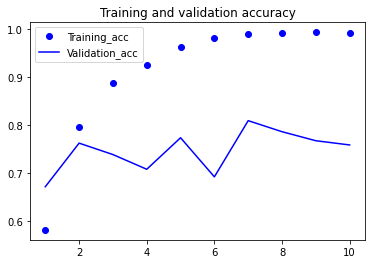

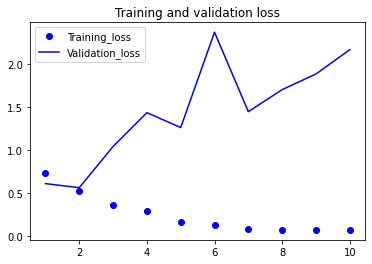

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training_acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation_acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = "Training_loss")
plt.plot(epochs, val_loss, 'b', label = 'Validation_loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# LSTM 

output_t = activation((c_t) * acitvation(dot(input_t, W0) + dot(state_t, U0)+ b0)

i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bi)
k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bi)

c_t = i_t * k_t+ c_t * f_t

In [0]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation ='sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 5s 34ms/step - loss: 0.5192 - acc: 0.7544 - val_loss: 0.3980 - val_acc: 0.8354
Epoch 2/10
157/157 [==============================] - 5s 32ms/step - loss: 0.3056 - acc: 0.8831 - val_loss: 0.3720 - val_acc: 0.8452
Epoch 3/10
157/157 [==============================] - 5s 32ms/step - loss: 0.2397 - acc: 0.9090 - val_loss: 0.2767 - val_acc: 0.8806
Epoch 4/10
157/157 [==============================] - 5s 32ms/step - loss: 0.2043 - acc: 0.9255 - val_loss: 0.3294 - val_acc: 0.8552
Epoch 5/10
157/157 [==============================] - 5s 32ms/step - loss: 0.1814 - acc: 0.9342 - val_loss: 0.2930 - val_acc: 0.8932
Epoch 6/10
157/157 [==============================] - 5s 32ms/step - loss: 0.1626 - acc: 0.9423 - val_loss: 0.2955 - val_acc: 0.8824
Epoch 7/10
157/157 [==============================] - 5s 32ms/step - loss: 0.1469 - acc: 0.9479 - val_loss: 0.3025 - val_acc: 0.8760
Epoch 8/10
157/157 [==============================] - 5s 32ms/step - 

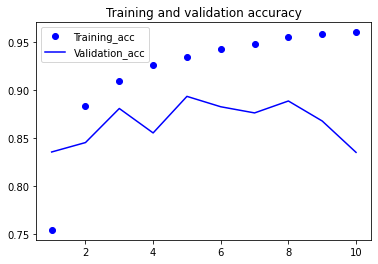

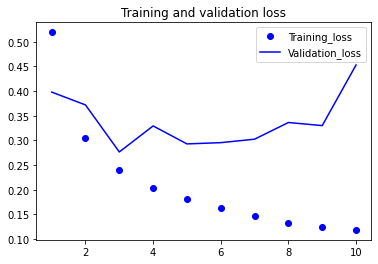

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training_acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation_acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = "Training_loss")
plt.plot(epochs, val_loss, 'b', label = 'Validation_loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [6]:
import os

data_dir = './drive/My Drive/'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data=f.read()
f.close()
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [0]:
import numpy as np

float_data = np.zeros((len(lines), len(header) -1))
for i, line in enumerate(lines):
  values = [float(x) for x in line.split(',')[1:]]
  float_data[i, :] = values

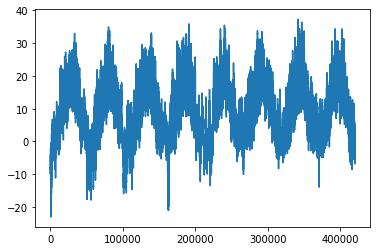

In [0]:
from matplotlib import pyplot as plt

temp = float_data[:, 1]
plt.plot(range(len(temp)), temp)

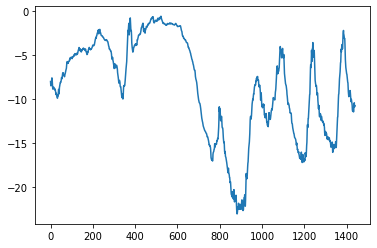

In [0]:
plt.plot(range(1440) ,temp[:1440])

In [0]:
mean = float_data[:200000].mean(axis = 0)
float_data -= mean
std = float_data[:200000].std(axis = 0)
float_data /= std

In [0]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [0]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# 전체 검증 세트를 순회하기 위해 val_gen에서 추출할 횟수
val_steps = (300000 - 200001 - lookback) // batch_size

# 전체 테스트 세트를 순회하기 위해 test_gen에서 추출할 횟수
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [11]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    
evaluate_naive_method()

0.2897359729905486


In [0]:
celsius_mae = 0.29 * std[1]
print(celsius_mae)

2.5672247338393395


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
500/500 [==============================] - 10s 21ms/step - loss: 1.7156 - val_loss: 0.7739
Epoch 2/20
500/500 [==============================] - 11s 21ms/step - loss: 0.5773 - val_loss: 0.3309
Epoch 3/20
500/500 [==============================] - 10s 21ms/step - loss: 0.3287 - val_loss: 0.3796
Epoch 4/20
500/500 [==============================] - 10s 21ms/step - loss: 0.2777 - val_loss: 0.3053
Epoch 5/20
500/500 [==============================] - 10s 21ms/step - loss: 0.2602 - val_loss: 0.3035
Epoch 6/20
500/500 [==============================] - 10s 21ms/step - loss: 0.2510 - val_loss: 0.3127
Epoch 7/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2415 - val_loss: 0.3174
Epoch 8/20
500/500 [==============================] - 11s 21ms/step - loss: 0.2344 - val_loss: 0.3160
Epoch 9/20
500/500 [==============================] - 10s 21ms/step - loss: 0.2295 - val_loss: 0.3705
Epoch 

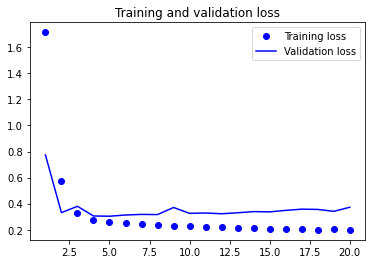

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 15s 30ms/step - loss: 0.3056 - val_loss: 0.2663
Epoch 2/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2833 - val_loss: 0.2678
Epoch 3/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2765 - val_loss: 0.2651
Epoch 4/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2723 - val_loss: 0.2653
Epoch 5/20
500/500 [==============================] - 15s 29ms/step - loss: 0.2673 - val_loss: 0.2644
Epoch 6/20
500/500 [==============================] - 15s 29ms/step - loss: 0.2638 - val_loss: 0.2671
Epoch 7/20
500/500 [==============================] - 15s 29ms/step - loss: 0.2591 - val_loss: 0.2650
Epoch 8/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2533 - val_loss: 0.2669
Epoch 9/20
500/500 [==============================] - 15s 29ms/step - loss: 0.2502 - val_loss: 0.2698
Epoch 10/20
500/500 [==============================] - 15s 30ms/step - loss: 0.246

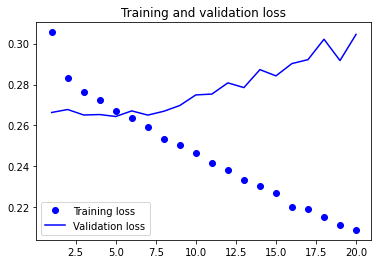

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_gen,
                              validation_steps=val_steps) # 에폭수 10으로 줄여서 시도

Epoch 1/10
500/500 [==============================] - 434s 867ms/step - loss: 0.3267 - val_loss: 0.3002
Epoch 2/10
500/500 [==============================] - 418s 836ms/step - loss: 0.3067 - val_loss: 0.2737
Epoch 3/10
500/500 [==============================] - 424s 847ms/step - loss: 0.2994 - val_loss: 0.2769
Epoch 4/10
500/500 [==============================] - 424s 847ms/step - loss: 0.2960 - val_loss: 0.2750
Epoch 5/10
500/500 [==============================] - 425s 850ms/step - loss: 0.2924 - val_loss: 0.2799
Epoch 6/10
500/500 [==============================] - 420s 841ms/step - loss: 0.2886 - val_loss: 0.2678
Epoch 7/10
500/500 [==============================] - 419s 838ms/step - loss: 0.2865 - val_loss: 0.2696
Epoch 8/10
500/500 [==============================] - 414s 828ms/step - loss: 0.2811 - val_loss: 0.2667
Epoch 9/10
500/500 [==============================] - 427s 854ms/step - loss: 0.2787 - val_loss: 0.2743
Epoch 10/10
500/500 [==============================] - 452s 904m

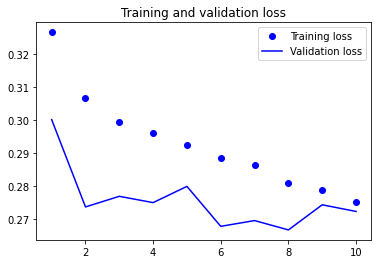

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1, 
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/10
500/500 [==============================] - 912s 2s/step - loss: 0.3203 - val_loss: 0.2749
Epoch 2/10
500/500 [==============================] - 904s 2s/step - loss: 0.2988 - val_loss: 0.2739
Epoch 3/10
500/500 [==============================] - 932s 2s/step - loss: 0.2925 - val_loss: 0.2697
Epoch 4/10
500/500 [==============================] - 931s 2s/step - loss: 0.2856 - val_loss: 0.2635
Epoch 5/10
500/500 [==============================] - 935s 2s/step - loss: 0.2788 - val_loss: 0.2665
Epoch 6/10
500/500 [==============================] - 862s 2s/step - loss: 0.2725 - val_loss: 0.2720
Epoch 7/10
500/500 [==============================] - 852s 2s/step - loss: 0.2685 - val_loss: 0.2860
Epoch 8/10
500/500 [==============================] - 852s 2s/step - loss: 0.2630 - val_loss: 0.2819
Epoch 9/10
500/500 [==============================] - 853s 2s/step - loss: 0.2590 - val_loss: 0.2780
Epoch 10/10
500/500 [==============================] - 863s 2s/step - loss: 0.2526 - val_lo

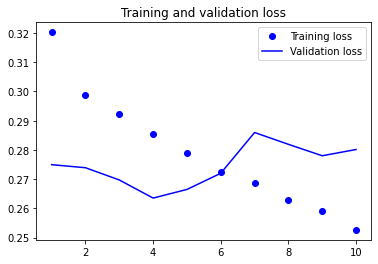

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [3]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

max_features = 10000
maxlen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words = max_features)


x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

x_train = sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = sequence.pad_sequences(x_test, maxlen = maxlen)

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 8s 49ms/step - loss: 0.4834 - acc: 0.7704 - val_loss: 0.3205 - val_acc: 0.8746
Epoch 2/10
157/157 [==============================] - 7s 45ms/step - loss: 0.3139 - acc: 0.8803 - val_loss: 0.3208 - val_acc: 0.8718
Epoch 3/10
157/157 [==============================] - 7s 46ms/step - loss: 0.2551 - acc: 0.9071 - val_loss: 0.3422 - val_acc: 0.8760
Epoch 4/10
157/157 [==============================] - 7s 46ms/step - loss: 0.2171 - acc: 0.9208 - val_loss: 0.3076 - val_acc: 0.8762
Epoch 5/10
157/157 [==============================] - 7s 46ms/step - loss: 0.1954 - acc: 0.9316 - val_loss: 0.8847 - val_acc: 0.7570
Epoch 6/10
157/157 [==============================] - 7s 45ms/step - loss: 0.1747 - acc: 0.9382 - val_loss: 0.3858 - val_acc: 0.8420
Epoch 7/10
157/157 [==============================] - 7s 45ms/step - loss: 0.1554 - acc: 0.9462 - val_loss: 0.4292 - val_acc: 0.8712
Epoch 8/10
157/157 [==============================] - 7s 45ms/step - 

In [4]:
model = Sequential()
model.add(layers.Embedding(max_features , 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_size = 0.2)

Epoch 1/10
196/196 [==============================] - 8s 43ms/step - loss: 0.5370 - acc: 0.7353
Epoch 2/10
196/196 [==============================] - 8s 43ms/step - loss: 0.3346 - acc: 0.8690
Epoch 3/10
196/196 [==============================] - 8s 43ms/step - loss: 0.2727 - acc: 0.8993
Epoch 4/10
196/196 [==============================] - 9s 44ms/step - loss: 0.2389 - acc: 0.9138
Epoch 5/10
196/196 [==============================] - 8s 43ms/step - loss: 0.2208 - acc: 0.9230
Epoch 6/10
196/196 [==============================] - 8s 43ms/step - loss: 0.1972 - acc: 0.9306
Epoch 7/10
196/196 [==============================] - 8s 43ms/step - loss: 0.1819 - acc: 0.9381
Epoch 8/10
196/196 [==============================] - 9s 43ms/step - loss: 0.1689 - acc: 0.9430
Epoch 9/10
196/196 [==============================] - 8s 43ms/step - loss: 0.1571 - acc: 0.9454
Epoch 10/10
196/196 [==============================] - 8s 43ms/step - loss: 0.1529 - acc: 0.9483


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Bidirectional(
    layers.GRU(32),input_shape = (None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer = RMSprop(), loss = 'mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch = 500,
                              epochs = 40,
                              validation_data = val_gen,
                              validation_steps = val_steps)

Epoch 1/40
500/500 [==============================] - 21s 42ms/step - loss: 0.2986 - val_loss: 0.2703
Epoch 2/40
500/500 [==============================] - 20s 41ms/step - loss: 0.2743 - val_loss: 0.2643
Epoch 3/40
500/500 [==============================] - 21s 41ms/step - loss: 0.2683 - val_loss: 0.2682
Epoch 4/40
500/500 [==============================] - 20s 41ms/step - loss: 0.2617 - val_loss: 0.2648
Epoch 5/40
500/500 [==============================] - 20s 40ms/step - loss: 0.2551 - val_loss: 0.2701
Epoch 6/40
500/500 [==============================] - 20s 40ms/step - loss: 0.2508 - val_loss: 0.2695
Epoch 7/40
500/500 [==============================] - 21s 41ms/step - loss: 0.2433 - val_loss: 0.2698
Epoch 8/40
500/500 [==============================] - 20s 40ms/step - loss: 0.2354 - val_loss: 0.2779
Epoch 9/40
500/500 [==============================] - 20s 40ms/step - loss: 0.2300 - val_loss: 0.2865
Epoch 10/40
500/500 [==============================] - 20s 40ms/step - loss: 0.222

In [19]:
# 1D convnet

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence


max_features = 10000
max_len = 500

print('데이터 로드....')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)
print(len(x_train), '훈련 시퀀스')
print(len(x_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen = max_len)
x_test = sequence.pad_sequences(x_test, maxlen = max_len)
print('x_train 의 크기:', x_train.shape)
print('x_test의 크기 :', x_test.shape)

데이터 로드....
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
x_train 의 크기: (25000, 500)
x_test의 크기 : (25000, 500)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers  import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length = max_len))
model.add(layers.Conv1D(32, 7, activation = 'relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation = 'relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer = RMSprop(lr = 1e-4),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

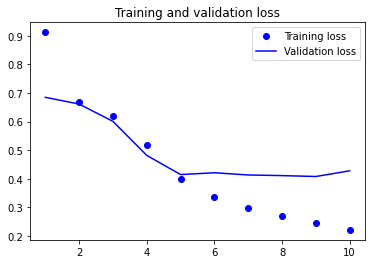

In [22]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation ='relu',
                        input_shape = (None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation = 'relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation = 'relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.compile(optimizer = RMSprop(), loss = 'mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch = 500,
                              epochs = 20,
                              validation_data = val_gen,
                              validation_steps = val_steps)

Epoch 1/20
500/500 [==============================] - 11s 23ms/step - loss: 0.4171 - val_loss: 0.4426
Epoch 2/20
500/500 [==============================] - 11s 22ms/step - loss: 0.3603 - val_loss: 0.4530
Epoch 3/20
500/500 [==============================] - 11s 23ms/step - loss: 0.3373 - val_loss: 0.4663
Epoch 4/20
500/500 [==============================] - 12s 24ms/step - loss: 0.3179 - val_loss: 0.4438
Epoch 5/20
500/500 [==============================] - 12s 23ms/step - loss: 0.3038 - val_loss: 0.4568
Epoch 6/20
500/500 [==============================] - 12s 23ms/step - loss: 0.2954 - val_loss: 0.4443
Epoch 7/20
500/500 [==============================] - 12s 24ms/step - loss: 0.2860 - val_loss: 0.4740
Epoch 8/20
500/500 [==============================] - 12s 23ms/step - loss: 0.2778 - val_loss: 0.4811
Epoch 9/20
500/500 [==============================] - 12s 23ms/step - loss: 0.2739 - val_loss: 0.4774
Epoch 10/20
500/500 [==============================] - 11s 23ms/step - loss: 0.269

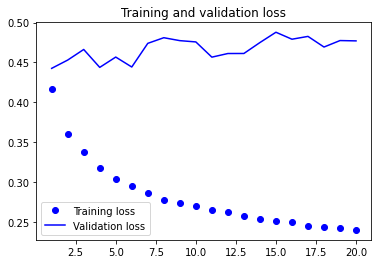

In [28]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
step = 3
looback = 1440
delay = 144

train_gen = generator(float_data,
                      lookback = lookback,
                      delay = delay ,
                      min_index = 0,
                      max_index = 200000,
                      shuffle = True,
                      step = step)
val_gen = generator(float_data,
                      lookback = lookback,
                      delay = delay ,
                      min_index = 200001,
                      max_index = 300000,
                      shuffle = True,
                      step = step)
test_gen = generator(float_data,
                      lookback = lookback,
                      delay = delay ,
                      min_index = 300001,
                      max_index = None,
                      shuffle = True,
                      step = step)

val_steps = (300000 - 200001 - lookabck) // 128
test_steps = (len(float_data) - 300001 - lookback) // 128

In [30]:
model = Sequential()
model.add(layers.Conv1D(32, 5, activation = 'relu',
                        input_shape = (None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation = 'relu'))
model.add(layers.GRU(32, dropout = 0.1, recurrent_dropout = 0.5))
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer = RMSprop(), loss = 'mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch = 500,
                              epochs = 20,
                              validation_data = val_gen,
                              validation_steps = val_steps)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, None, 32)          0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, None, 32)          5152      
_________________________________________________________________
gru_3 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 13,793
Trainable params: 13,793
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
500/500 [==============================] - 139s 278ms/step - loss: 0.3392 - val_loss: 0.3108
Epoch 2/20


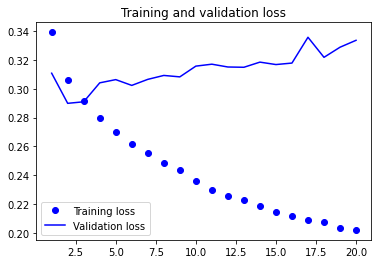

In [31]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()